In [1]:
%matplotlib inline

In [2]:
import math
import random
import statistics as st
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats, integrate

# Super Class #

In [3]:
class Player:
    def __init__(self, name):
        self.name = name
    
        
    def break_loop(self, previous_rolls, turn_score):
        if previous_rolls > 0:
            return False
        else:
            return True
    
    
    def play_turn(self):
        previous_rolls = 0
        turn_score = 0
        while self.break_loop(previous_rolls, turn_score):
            roll = random.randint(1, 6)
            if roll == 1:
                return 0
            else:
                turn_score += roll
                previous_rolls += 1
        return turn_score      
    
    

## Subclass 1 ##

In [4]:
class Player_break_by_num_rolls(Player):
    def __init__(self, rolls_to_break):
        self.rolls_to_break = rolls_to_break
        
        
    def break_loop(self, previous_rolls, turn_score):
        if previous_rolls >= self.rolls_to_break:
            return False
        else:
            return True

        

## Subclass 2 ##

In [5]:
class Player_break_by_bank_amt(Player):
    def __init__(self, bank_amount_to_break):
        self.bank_amount_to_break = bank_amount_to_break
        
    def break_loop(self, previous_rolls, turn_score):
        if turn_score >= self.bank_amount_to_break:
            return False
        else:
            return True

## Game + Gameloop ##

In [6]:
def game(player):
    turn = 1
    score = 0
    while turn < 8:
        turn_score = player.play_turn()
        score += turn_score
        turn += 1
    return score
        
 
        

In [7]:
def game_loop(num_of_sims, player):
    scores = []
    count_of_sims = 0
    while count_of_sims < num_of_sims:
        player_score = game(player)
        scores.append(player_score)
        count_of_sims += 1
    return scores

## Finding optimal number of rolls before banking ##

In [8]:
def game_loops_with_changing_rolls(max_num_rolls, num_of_sims):
    rolls_break = 1
    list_of_game_results = []
    while rolls_break <= max_num_rolls:
        player = Player_break_by_num_rolls(rolls_break)
        results = game_loop(num_of_sims, player)
        list_of_game_results.append(results)
        rolls_break += 1
    return list_of_game_results

In [9]:
player_two_delta_rolls = game_loops_with_changing_rolls(30, 100000)

In [10]:
mean_by_num_of_rolls_before_break = [st.mean(list) for list in player_two_delta_rolls]

In [11]:
stdev_by_num_of_rolls_before_break = [st.stdev(list) for list in player_two_delta_rolls]

In [12]:
median_by_num_of_rolls_before_break = [st.median(list) for list in player_two_delta_rolls]

In [13]:
max_by_num_of_rolls_before_break = [max(list) for list in player_two_delta_rolls]

In [14]:
min_by_num_of_rolls_before_break = [min(list) for list in player_two_delta_rolls]

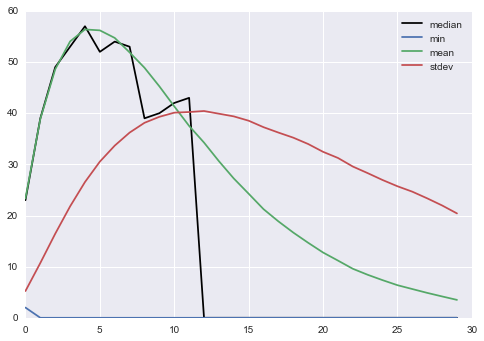

In [15]:
plt.plot(median_by_num_of_rolls_before_break, color='black', label="median")
plt.plot(min_by_num_of_rolls_before_break, label="min")
plt.plot(mean_by_num_of_rolls_before_break, label="mean")
plt.plot(stdev_by_num_of_rolls_before_break, label="stdev")

plt.legend(loc='upper right')

plt.show()

## Finding optimal current turn amount before banking ##

In [16]:
def game_loops_with_changing_bank_amt(max_num_of_bank, num_of_sims):
    when_to_bank = 1
    list_results = []
    while when_to_bank <= max_num_of_bank:
        player_one = Player_break_by_bank_amt(when_to_bank)
        results = game_loop(num_of_sims, player_one)
        list_results.append(results)
        when_to_bank += 1
    return list_results

In [17]:
player_three_delta_banks = game_loops_with_changing_bank_amt(30, 100000)

In [18]:
mean_by_bank_break = [st.mean(list) for list in player_three_delta_banks]

In [19]:
stdev_by_bank_break = [st.stdev(list) for list in player_three_delta_banks]

In [20]:
max_by_bank_break = [max(list) for list in player_three_delta_banks]

In [21]:
min_by_bank_break = [min(list) for list in player_three_delta_banks]

In [22]:
median_by_bank_break = [st.median(list) for list in player_three_delta_banks]

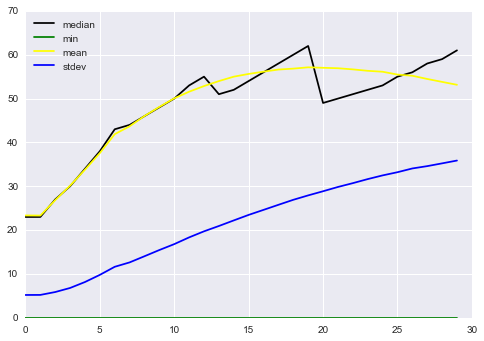

In [23]:
plt.plot(median_by_bank_break, color='black', label="median")
plt.plot(min_by_bank_break, color='green', label="min")
plt.plot(mean_by_bank_break, color='yellow', label="mean")
plt.plot(stdev_by_bank_break, color='blue', label="stdev")

plt.legend(loc='upper left')

plt.show()

## Comparing stats from both methods ##

### Comparing Means from both methods ###

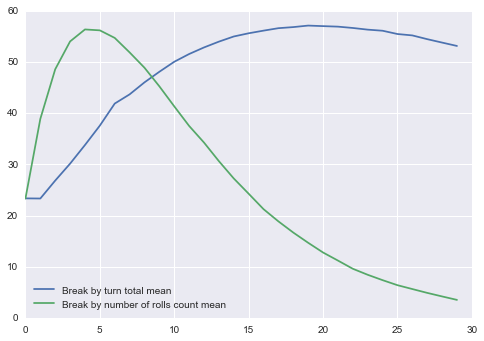

In [24]:
plt.plot(mean_by_bank_break, label="Break by turn total mean")
plt.plot(mean_by_num_of_rolls_before_break, label="Break by number of rolls count mean")
plt.legend(loc='lower left')
plt.show()

### Comparing st. devs from both methods ###

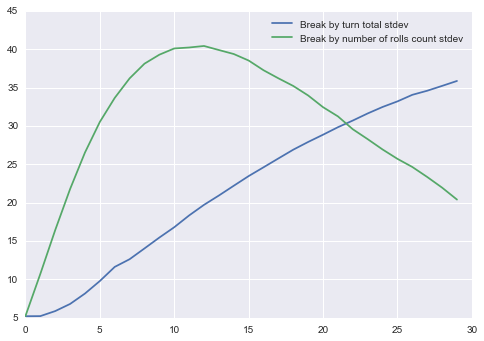

In [25]:

plt.plot(stdev_by_bank_break, label='Break by turn total stdev')
plt.plot(stdev_by_num_of_rolls_before_break, label='Break by number of rolls count stdev')
plt.legend(loc='upper right')
plt.show()


### Comparing means and st. devs from both methods ###

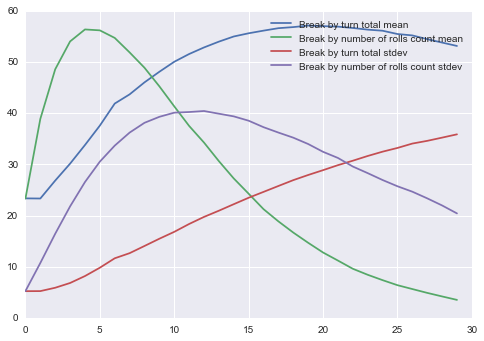

In [26]:
plt.plot(mean_by_bank_break, label="Break by turn total mean")
plt.plot(mean_by_num_of_rolls_before_break, label='Break by number of rolls count mean')
plt.plot(stdev_by_bank_break, label="Break by turn total stdev")
plt.plot(stdev_by_num_of_rolls_before_break, label="Break by number of rolls count stdev")

plt.legend(loc='upper right')
plt.show()


### Comparing max values from both methods ###

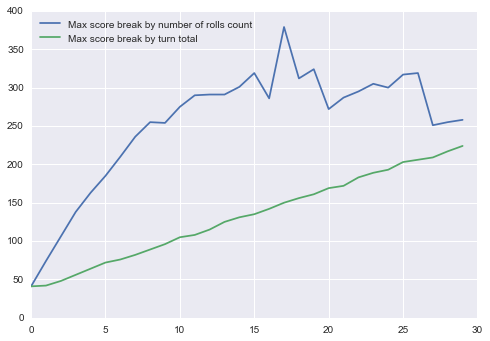

In [27]:
plt.plot(max_by_num_of_rolls_before_break, label="Max score break by number of rolls count")
plt.plot(max_by_bank_break, label="Max score break by turn total")

plt.legend(loc='upper left')
plt.show()

## Creating players from both methods and playing them against eachother ##

In [28]:
five_rolls_per_turn = Player_break_by_num_rolls(5)
breaks_at_turn_count_17 = Player_break_by_bank_amt(17)

In [29]:
def pvp_game(player_one, player_two, number_of_games):
    count_of_games = 0
    player_one_wins = 0
    player_two_wins = 0
    player_one_list = []
    player_two_list = []
    while count_of_games < number_of_games:
        player_one_round = game(player_one)
        player_two_round = game(player_two) 
        if player_one_round > player_two_round:
            player_one_wins += 1
        elif count_of_games % 1000 == 0:
            player_one_list.append(player_one_wins)
            player_two_list.append(player_two_wins)
        else:
            player_two_wins += 1
        count_of_games += 1
    return player_one_wins, player_two_wins, player_one_list, player_two_list
         

In [30]:
five_rolls_per_turn, breaks_at_turn_count_17, roll_count_wins, turn_count_wins = pvp_game(five_rolls_per_turn, breaks_at_turn_count_17, 1000000)

In [31]:
print(five_rolls_per_turn)

502565


In [32]:
print(breaks_at_turn_count_17)

496942


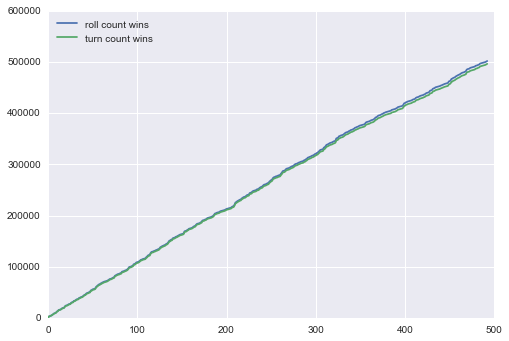

In [33]:
plt.plot(roll_count_wins, label='roll count wins')
plt.plot(turn_count_wins, label='turn count wins')


plt.legend(loc='upper left')
plt.show()

